<a href="https://colab.research.google.com/github/Dmitze/Dmitze/blob/main/%D0%94%D0%97_%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B8_%D0%A1%D0%BB%D1%96%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

## 1. Завантажуємо модель і робимо DataFrame

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pickle
file_path = '/content/drive/MyDrive/Colab Notebooks/word_embeddings_subset.p'

with open(file_path, 'rb') as f:
    words = pickle.load(f)

print('Скільки слів:', len(words))
print('Приклади:', list(words.keys())[:10])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Скільки слів: 243
Приклади: ['country', 'city', 'China', 'Iraq', 'oil', 'town', 'Canada', 'London', 'England', 'Australia']


In [12]:
# Беру тільки 3 координати
words_3d = {}
for word, vec in words.items():
    words_3d[word] = vec[:3]

print("Зробив 3D вектори")

Зробив 3D вектори


In [13]:
# DataFrame
data = []
for word, vec in words_3d.items():
    data.append({'слово': word, 'x': vec[0], 'y': vec[1], 'z': vec[2]})

df = pd.DataFrame(data)
print(df.head(20))

          слово         x         y         z
0       country -0.080078  0.133789  0.143555
1          city -0.010071  0.057373  0.183594
2         China -0.073242  0.135742  0.108887
3          Iraq  0.191406  0.125000 -0.065430
4           oil -0.139648  0.062256 -0.279297
5          town  0.123535  0.159180  0.030029
6        Canada -0.136719 -0.154297  0.269531
7        London -0.267578  0.092773 -0.238281
8       England -0.198242  0.115234  0.062500
9     Australia  0.048828 -0.194336 -0.041504
10        Japan  0.050781  0.250000  0.166992
11     Pakistan -0.308594  0.029175  0.185547
12         Iran -0.126953  0.165039  0.213867
13          gas -0.161133  0.105469 -0.138672
14        happy -0.000519  0.160156  0.001610
15       Russia -0.077148 -0.008606  0.122559
16  Afghanistan -0.057373  0.038330  0.026001
17       France  0.048584  0.078613  0.324219
18      Germany  0.259766  0.140625  0.247070
19      Georgia  0.125977 -0.247070  0.006409


## 2. Функція пошуку схожих слів

In [14]:
def podobnist(v1, v2):
    return dot(v1, v2) / (norm(v1) * norm(v2))

def najty_slovo(vektor, vsli_slova, skip=[], top=1):
    rez = []
    for slovo, v in vsli_slova.items():
        if slovo not in skip:
            sim = podobnist(vektor, v)
            rez.append((slovo, sim))
    rez.sort(key=lambda x: x[1], reverse=True)
    return rez[:top]

In [15]:
# Тестую
test_slova = ['king', 'woman', 'paris', 'happy', 'computer']

for slovo in test_slova:
    if slovo in words_3d:
        print(f"\n{slovo}:")
        vec = words_3d[slovo]
        blyzki = najty_slovo(vec, words_3d, skip=[slovo], top=5)
        for s, sim in blyzki:
            print(f"  {s}: {sim:.3f}")


king:
  Liechtenstein: 0.990
  Damascus: 0.989
  Ireland: 0.986
  Niger: 0.981
  Greece: 0.975

happy:
  Paris: 0.989
  Nairobi: 0.983
  Sudan: 0.976
  Tunis: 0.970
  Mozambique: 0.966


In [16]:
# Перевірка на випадковому векторі
random_vec = np.array([0.4, 0.2, -0.3])
print("Випадковий вектор:", random_vec)

rezultat = najty_slovo(random_vec, words_3d, top=5)
print("\nНайближчі:")
for s, sim in rezultat:
    print(f"  {s}: {sim:.3f}")

Випадковий вектор: [ 0.4  0.2 -0.3]

Найближчі:
  Beirut: 0.983
  Jordan: 0.978
  Egypt: 0.954
  Mauritania: 0.953
  Iraq: 0.946


## 3. Векторний добуток

In [17]:
pary = [('king', 'queen'), ('man', 'woman'), ('france', 'paris'),
        ('happy', 'sad'), ('big', 'small'), ('good', 'bad'),
        ('hot', 'cold'), ('north', 'south')]

rez = []

for w1, w2 in pary:
    if w1 in words_3d and w2 in words_3d:
        v1 = words_3d[w1]
        v2 = words_3d[w2]

        cross = np.cross(v1, v2)
        blyzke = najty_slovo(cross, words_3d, skip=[w1, w2], top=3)

        print(f"\n{w1} × {w2}")
        print(f"  Результат: {cross}")
        print(f"  Довжина: {norm(cross):.3f}")
        print(f"  Схоже на:")
        for s, sim in blyzke:
            print(f"    {s} ({sim:.3f})")

        rez.append({'w1': w1, 'w2': w2, 'len': norm(cross), 'word': blyzke[0][0]})


king × queen
  Результат: [-0.00082976  0.00877988 -0.01824087]
  Довжина: 0.020
  Схоже на:
    Morocco (0.995)
    Amman (0.995)
    Gaborone (0.985)

happy × sad
  Результат: [ 0.01063969  0.00033969 -0.03036591]
  Довжина: 0.032
  Схоже на:
    Madagascar (0.963)
    Lilongwe (0.962)
    Valletta (0.930)


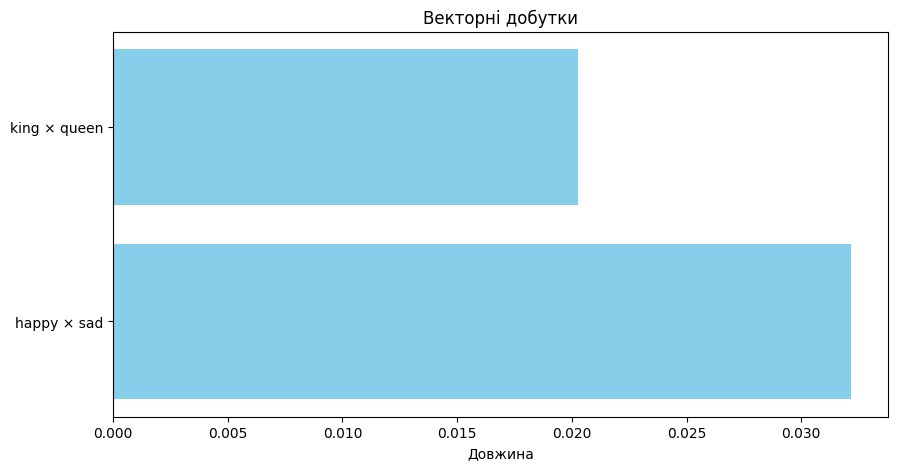

In [18]:
# Малюю графік
plt.figure(figsize=(10, 5))
names = [f"{r['w1']} × {r['w2']}" for r in rez]
lens = [r['len'] for r in rez]

plt.barh(names, lens, color='skyblue')
plt.xlabel('Довжина')
plt.title('Векторні добутки')
plt.gca().invert_yaxis()
plt.show()

**Висновок:**
Векторний добуток показує наскільки слова незалежні. Більша довжина, більш різні напрямки в просторі.

## 4. Кути між векторами

In [19]:
def kut(v1, v2):
    cos_val = podobnist(v1, v2)
    cos_val = np.clip(cos_val, -1.0, 1.0)
    rad = np.arccos(cos_val)
    return np.degrees(rad)

In [20]:
test_pary = [
    ('happy', 'joy'),
    ('king', 'queen'),
    ('man', 'woman'),
    ('good', 'bad'),
    ('hot', 'cold'),
    ('france', 'paris'),
    ('big', 'small'),
    ('computer', 'banana'),
    ('north', 'south'),
    ('young', 'old')
]

kuty = []

for w1, w2 in test_pary:
    if w1 in words_3d and w2 in words_3d:
        v1 = words_3d[w1]
        v2 = words_3d[w2]
        angle = kut(v1, v2)
        sim = podobnist(v1, v2)

        if angle < 60:
            typ = "схожі"
        elif angle < 120:
            typ = "різні"
        else:
            typ = "протилежні"

        print(f"{w1} - {w2}: {angle:.1f}° (sim={sim:.2f}) [{typ}]")
        kuty.append({'w1': w1, 'w2': w2, 'angle': angle, 'sim': sim, 'type': typ})

king - queen: 101.7° (sim=-0.20) [різні]


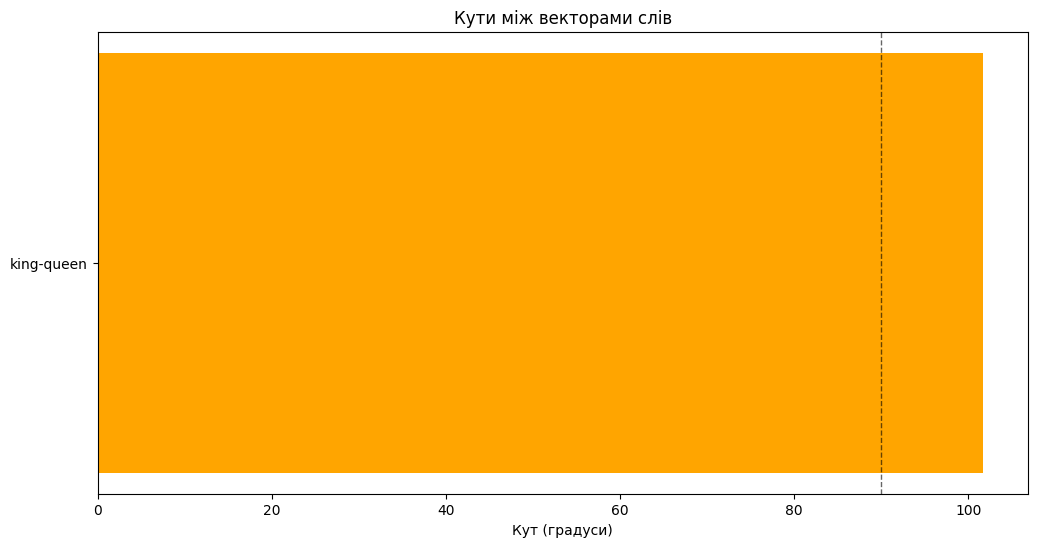

In [21]:
# Графік кутів
plt.figure(figsize=(12, 6))
names = [f"{k['w1']}-{k['w2']}" for k in kuty]
angles = [k['angle'] for k in kuty]
colors = ['green' if a < 60 else 'orange' if a < 120 else 'red' for a in angles]

plt.barh(names, angles, color=colors)
plt.xlabel('Кут (градуси)')
plt.title('Кути між векторами слів')
plt.axvline(x=90, color='black', linestyle='--', linewidth=1, alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

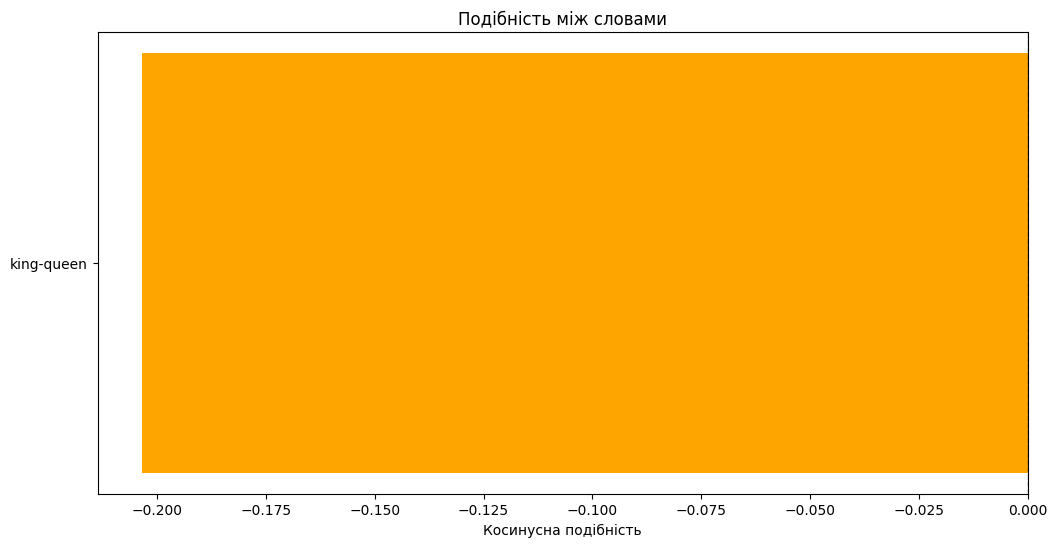

In [22]:
# Другий графік - подібність
plt.figure(figsize=(12, 6))
sims = [k['sim'] for k in kuty]
colors2 = ['green' if s > 0.3 else 'orange' if s > -0.3 else 'red' for s in sims]

plt.barh(names, sims, color=colors2)
plt.xlabel('Косинусна подібність')
plt.title('Подібність між словами')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

**Що зрозумів:**
- Кут < 60° = схожі слова (синоніми)
- Кут > 120° = протилежні (антоніми)
- Кут ~90° = не пов'язані

## 3D візуалізація

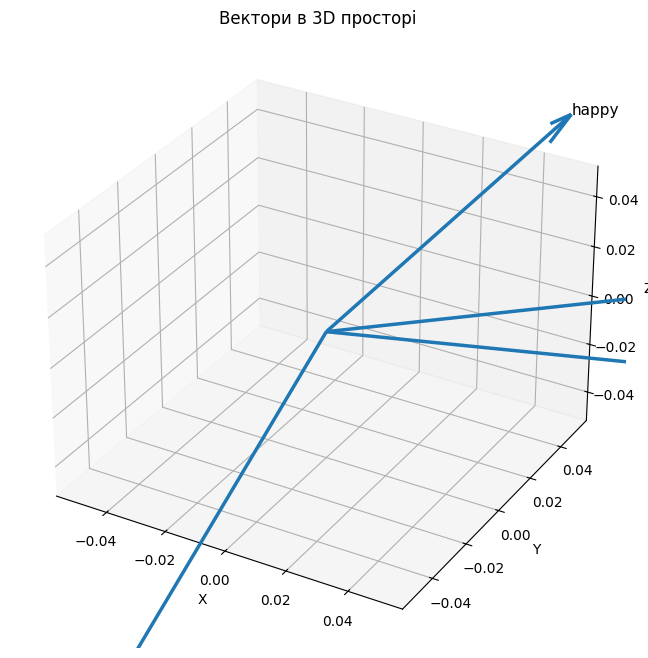

In [23]:
from mpl_toolkits.mplot3d import Axes3D

slova = ['king', 'queen', 'man', 'woman', 'france', 'paris', 'happy', 'sad']
slova = [s for s in slova if s in words_3d]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for s in slova:
    v = words_3d[s]
    ax.quiver(0, 0, 0, v[0], v[1], v[2], arrow_length_ratio=0.1, linewidth=2.5)
    ax.text(v[0], v[1], v[2], s, fontsize=11)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Вектори в 3D просторі')
plt.show()